In [1]:
import cv2
from matplotlib import pyplot as plt

In [4]:
#1
src = cv2.imread("./data/people.png")
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

len(loc1)= 0


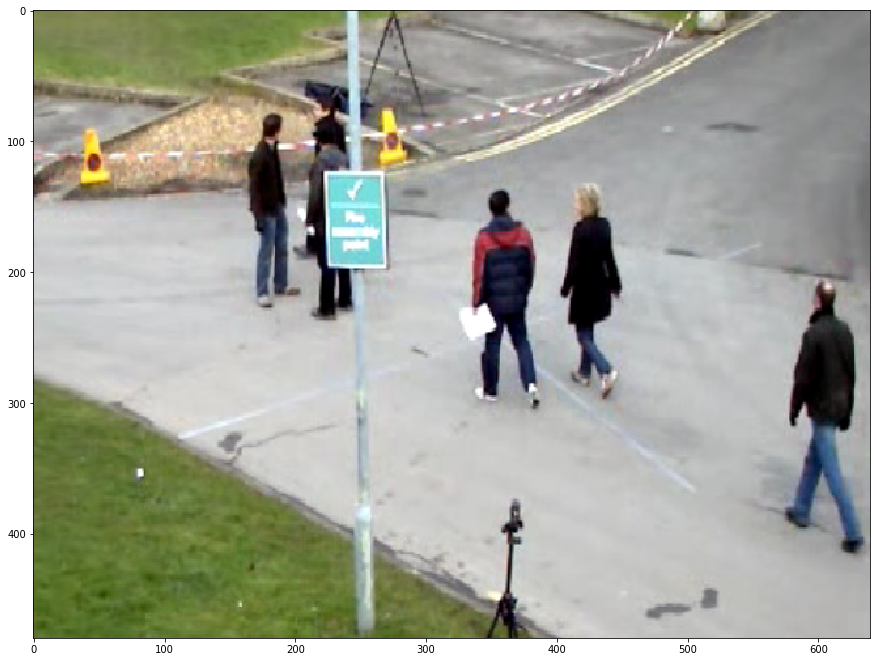

In [8]:
#2 디텍스 함수를 사용해서 만들었는데 128 * 64 가 아니라서
# 찾지를 못 했다.
loc1 , weights1 = hog.detect(src)
print("len(loc1)=", len(loc1))
dst1 = src.copy()
w, h = hog.winSize
for pt in loc1:
    x , y = pt
    cv2.rectangle(dst, (x,y), (x+w, y+h), (255,0,0),2)

dst1_rgb = cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,30))
plt.imshow(dst1_rgb)
plt.show()

len(loc2)= 3
weights2= [[3.51386292]
 [2.22279005]
 [2.27101844]]


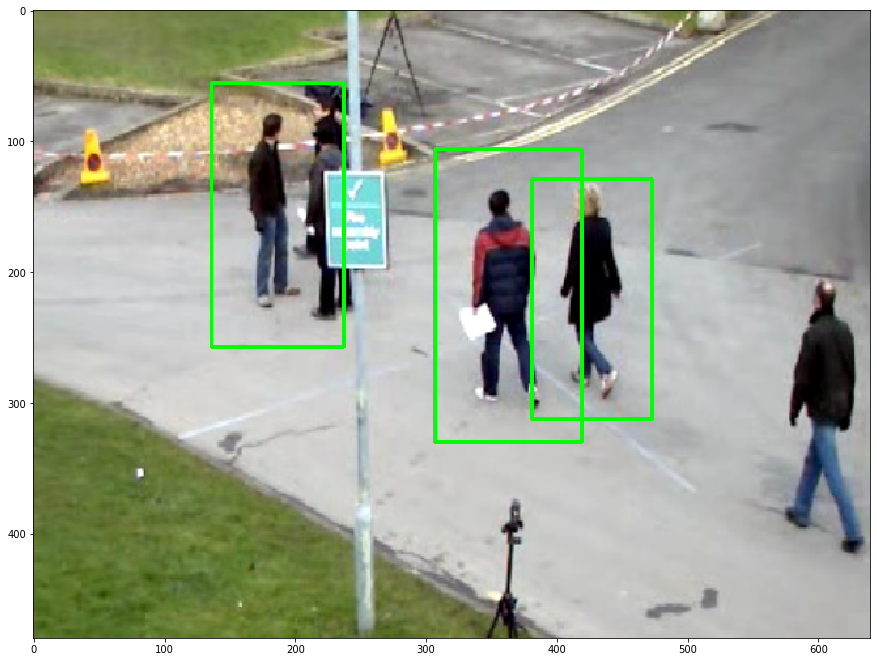

In [10]:
#3
#그래서 여러가지 스케일을 사용해서 (멀티 스케일)
#따라서 사이즈가 달라도 찾을 수 있을 것이다.
dst2 = src.copy()
loc2, weights2= hog.detectMultiScale(src)
print("len(loc2)=", len(loc2))
print("weights2=", weights2)
for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x+w, y+h), (0,255,0), 2)

dst2_rgb = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,30))
plt.imshow(dst2_rgb)
plt.show()

len(loc3)= 6
weights3= [[3.82788113]
 [2.49923764]
 [2.40610968]
 [1.13816959]
 [0.6425728 ]
 [0.37325614]]


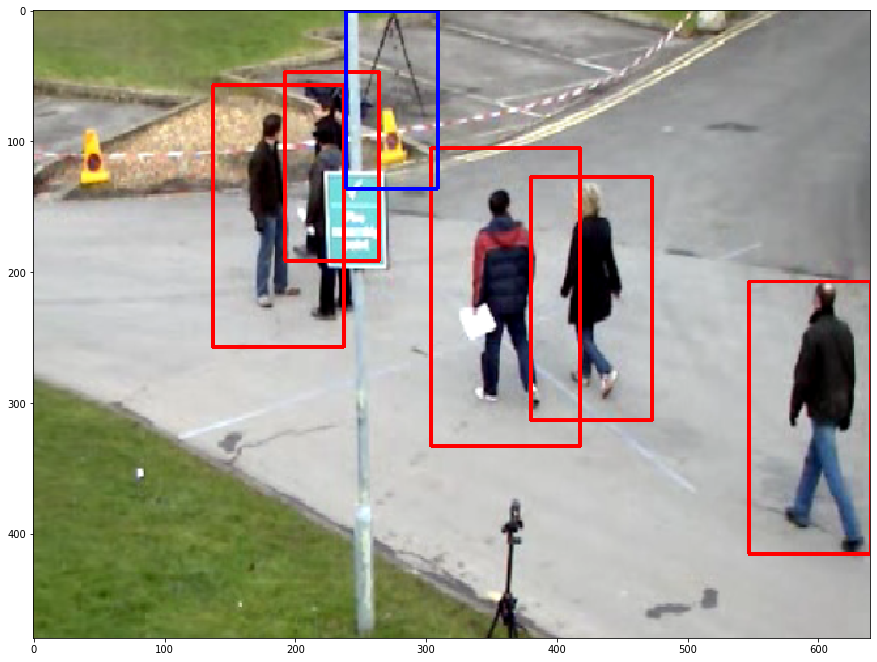

In [12]:
#4
#똑같이 디텍트 멀티 스케일을 사용했다
#하지만 안에 여러가지 파라미터를 넣어 줬다. 
#Stride는 딥러닝 배울 때 나오는 개념이다. Stride는 어쨋든 작은 화면이 원본 화면에서 
#몇칸식 움직이는지 하는 것
#그러면 구석 부분이 남게 되는데 그 부분은 8,8 로 채워랑 
dst3 = src.copy()
loc3, weights3= hog.detectMultiScale(src, winStride=(1,1), padding=(8,8))
print("len(loc3)=", len(loc3))
print("weights3=", weights3) #신뢰도를 의미한다. 
#딥러닝도 마찬가지고 XY WH 의 정보와 신뢰도에 대한 정보를 가져온다.
#그래서 weight의 신뢰도 값이 0.5 이상인 경우만 출력한다.
for i, rect in enumerate(loc3):
    x, y, w, h = rect
    
    if weights3[i] > 0.5:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (0,0,255), 2)
    else :
         cv2.rectangle(dst3, (x, y), (x+w, y+h), (255,0,0), 2)

dst3_rgb = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,30))
plt.imshow(dst3_rgb)
plt.show()